In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity

r.shape =  (1001, 2, 51)
total_ring_mass =  1.5e-09
shear_viscosity =  6e-13


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

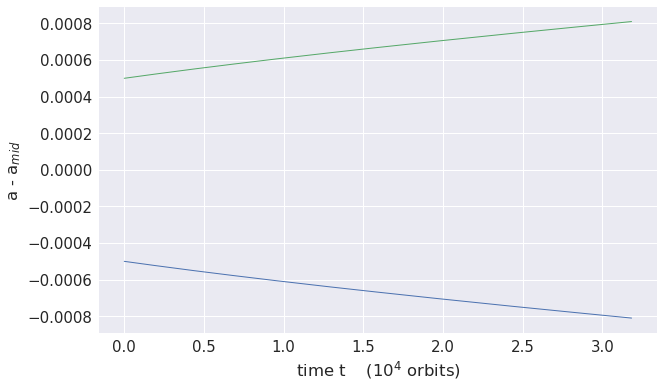

In [4]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
a_mid = a.mean(axis=1).mean(axis=1)
for pidx in range(number_of_streamlines):
    y = a[:, pidx].mean(axis=1) - a_mid
    x = times/(2*np.pi)/1.0e4
    p = ax.plot(x, y, marker='o', markersize=0, linestyle='-', linewidth=1, alpha=1)
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel('a - a$_{mid}$')

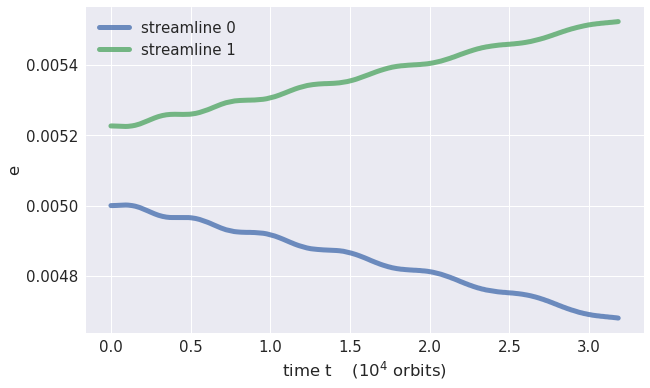

In [5]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
e_mid = e[:, number_of_streamlines/2].mean(axis=1)
for pidx in range(number_of_streamlines):
    y = e[:, pidx].mean(axis=1)
    x = times/(2*np.pi)/1.0e4
    lw = 2
    if (pidx ==0) or (pidx == number_of_streamlines/2) or (pidx == number_of_streamlines-1):
        lw = 5
    p = ax.plot(x, y, marker='o', markersize=0, linestyle='-', linewidth=lw, alpha=0.8, label='streamline '+str(pidx))
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel('e')
p = plt.legend()

In [6]:
#compute delta_a=a_outer-a_inner versus time
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_inner = a[:, 0, :].mean(axis=1)
delta_a = a_outer - a_inner

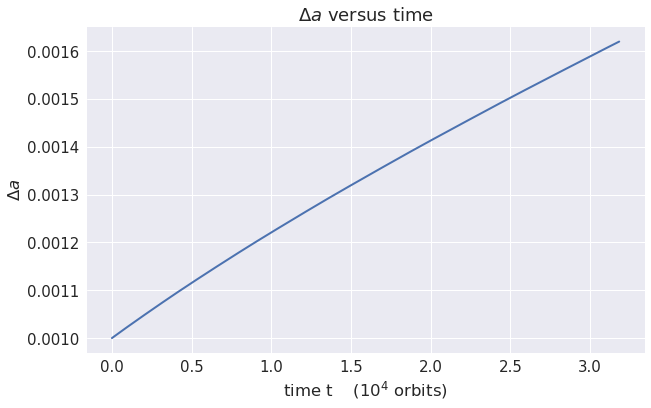

In [7]:
#plot delta_a versus time
x = times/(2*np.pi)/1.0e4
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta a$')
p = plt.legend()

In [8]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_mid = e[:, number_of_streamlines/2].mean(axis=1)
e_inner = e[:, 0, :].mean(axis=1)
delta_e = e_outer - e_inner
e_prime = a_mid*delta_e/delta_a

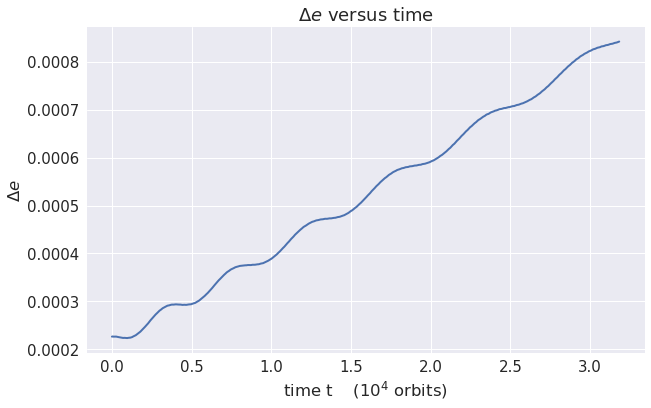

In [9]:
#plot delta_e versus time
x = times/(2*np.pi)/1.0e4
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta e$ versus time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

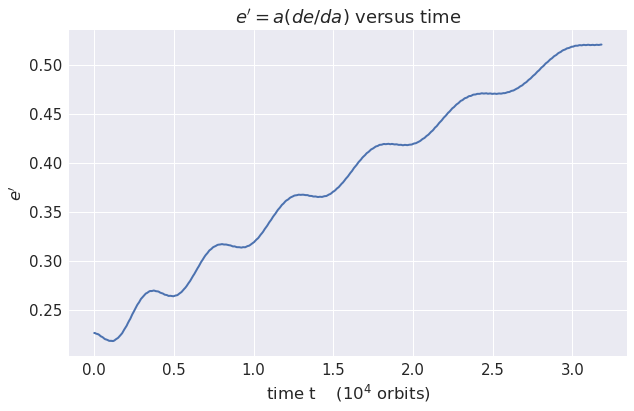

In [10]:
#plot e_prime versus time
x = times/(2*np.pi)/1.0e4
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = plt.legend()

In [11]:
#compute delta_wt=wt_outer-wt_inner
delta_wt_list = []
for tidx in range(len(times)):
    r_inner = r[tidx, 0, :]
    pidx = r_inner.argmin()
    dwt = wt[tidx, number_of_streamlines-1, pidx] - wt[tidx, 0, pidx]
    delta_wt_list += [dwt]
delta_wt = adjust_angle(np.array(delta_wt_list))

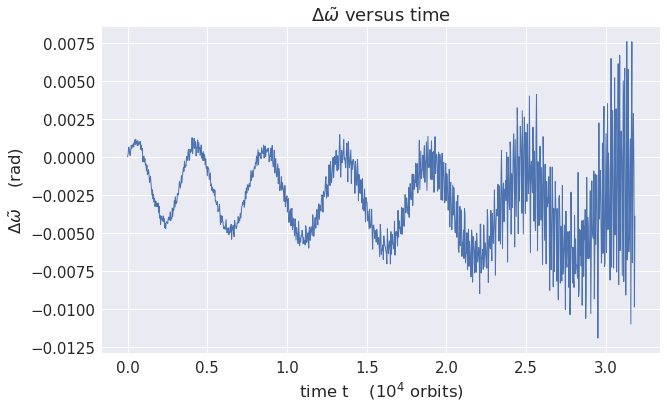

In [12]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e4
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()